In [50]:
from IPython.display import display
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import math

from sklearn import linear_model
from scipy import stats as scipystats
from scipy.stats import norm, kstest, boxcox
import statsmodels.api as sm
import statsmodels.stats as stats
import statsmodels.formula.api as smf

# Display preferences.
pd.options.display.float_format = '{:.3f}'.format

#plt.rcParams['figure.figsize'] = (50.0, 20.0)
#plt.rcParams.update({'font.size': 22})

import warnings
# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

### Simple Linear Regression
Unlike classifications, regression allows us to predict continous variables. **ordinary least square** is the most common regression method - OLS, it's somes times refered to as regression on it's own.
##### Simple Linear regression
OLS operates by finding estimators for the coefficient in defined formular. Like in the classifier, you have a target variable and one or more imput variables.**a simple linear regression** comprises of one target and one input variable. 

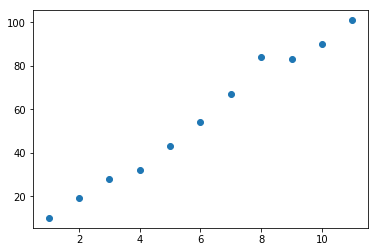

In [51]:
# Sample data to play with.
y = pd.DataFrame([10, 19, 28, 32, 43, 54, 67, 84, 83, 90, 101])
x = pd.DataFrame([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

plt.scatter(x, y)

The above can be modelled by the equation of a straight line: y=α+βx. To run a linear regression, provide this equation and the model will estimate the parameters i.e α and β. Rather than using probability like in Bayes, OLS learns throguh errors. i.e given the function passed in, OLS uses the estimation (α and β as per above example) that minimizes error (or residual). This error is by default, the sum of the squared distance between each datapoint the fit line, But could technically be any kind of distance measure you wan to specify. The goal of this algorithm then is to minimize the sum of these squared residuals over all of the data points in the training set.



##### Your first regression
To generate a **regression** using **scikit-learn**, use the **linear_model.LinearRegression** class to establish the model, and then fit the model to your x and y variables.

Coefficients: 
 [[9.38181818]]
Intercept: 
 [-0.74545455]


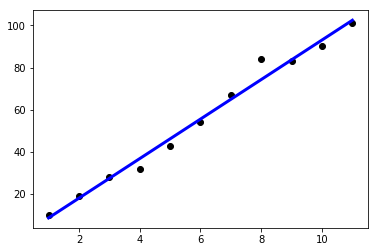

In [52]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

To generate predictions with this trained model, then, the model will simply input the x-value you wish to predict from into the equation. For example, the prediction for x = 12 would be:
y=−.75+9.38∗12=111.84

##### Multivariable Least Squares
Rather than a single variable equation as per above, OLS can handle almost any number of imput variables. When a least squares regression has more than one independent variable (or input) it is called **multivariable least squares linear regression**, **multiple linear regression**, or just **multivariable regression**. [*Note that this is different from "multivariate" regression, which involves more than one dependent variable.*]. This type of model is used when there multiple variables affecting the outcome.<br>

For example model the monthly rent of apartments can come down to:

Rent=α+SquareFootage+Bedrooms+Bathrooms+YearBuilt

This would seem like a much more robust model. Now all of these relationships are still linear, meaning each additional bedroom affects rent in the same way. The delta to rent will be equivalent for moving from 1 to 2 bedrooms and from 11 to 12. Again, this is the nature of linear regression. As with the simpler models, here again the linear regression algorithm arrives at estimates for coefficients in front of each variable that minimize the sum of squared errors. We'll cover how that algorithm functions in more detail later.

##### Categorical Variables
This can be something like a boolean {True, False} or state {WA, CA, OR, NV...}. Implying a single linear relationship between all of these values wouldn't make sense. Instead we treat each of them individually, allowing for each value to have its own associated coefficient. So if we wanted to include neighborhood in our example model we could do something like:<br>
Rent=α + SquareFootage + Bedrooms + Bathrooms + YearBuilt + Neighborhood <br>

Because these different categories are not linearly related, SKLearn wants separate binary indicators for each. So for every categorical value we have to create a column that is 0 or 1 indicating if the observation is of that category. <br>

let's say our town was broken into three neighborhoods: Downtown, South, and North. Then our specification would look something like: Rent=α + SquareFootage + Bedrooms + Bathrooms + YearBuilt + Downtown + South. One category will always be excluded. That's because it will be incorporated into the intercept (the  α ) and we would otherwise run into collinearity problems. Also, each of these categories would typically be mutually exclusive, which makes sense. If a house is in the South, it shouldn't simultaneously be in the North. Python offers you two real ways to deal with creating these indicators. The first is to do it manually. If this seems hard or complicated to you THEN YOU SHOULD ABSOLUTELY DO IT! It's good programming practice. However, SKLearn (of course) has a built in function called OneHotEncoder that will also do this kind of data preparation.

Note that OLS doesnt mean linear, it's totaly fine to have an equation like: y=α+x+x2. All we need to do is have a col for x and another col for x2 in the df. Some equations can even have sine or cosine.


##### Explanatory power: assumptions of linear regression
**R-Squared value,** this is a proportion (between 0 and 1) that expresses how much variance in the outcome variable our model was able to explain. <br>

Higher  R2(R square)  values are better to a point-- a low  R2  indicates that our model isn't explaining much information about the outcome, which means it will not give very good predictions. However, a very high  R2  is a warning sign for overfitting. No dataset is a perfect representation of reality, so a model that perfectly fits our data ( R2  of 1 or close to 1) is likely to be biased by quirks in the data, and will perform less well on the test-set.

##### Here's an example using a toy advertising dataset:

In [53]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

#plt.hist(data.Newspaper)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [54]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


###### Explanation of this result
The model explains 89.7% of the variance in sales. But we do not know the variance explined by individual variables
**Intercept** of 2.94 suggest the base sale with no advert in either TV, radio or newspaper
**Radio** advert has has the highest per unit increase in sale with coefficient of 0.189


##### Assumptions of Multivariable Linear Regression
For regression to work its magic, inputs to the model need to be consistent with four assumptions:

**1. linear relationship:** features in a regression need to have a linear relationship with the outcome. If the relationship is non-linear, the regression model will try to find any hint of a linear relationship, and only explain that – with predictable consequences for the validity of the model. Sometimes this can be fixed through non-linear tranformation. e.g if a variable has quadtric relationship with outcome, taking squareroot of the variable transforms the relationship to linear.

**2. multivariate normality:** The error from the model (calculated by subtracting the model-predicted values from the real outcome values) should be normally distributed. Since ordinary least squares regression models are fitted by choosing the parameters that best minimize error, skewness or outliers in the error can result in serious miss-estimations. Outliers or skewness in error can often be traced back to outliers or skewness in data.

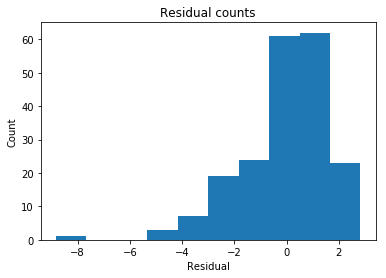

In [56]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

**3. homoscedasticity:**
The distribution of your error terms (its "scedasticity"), should be consistent for all predicted values, or **homoscedastic**. For example, if your error terms aren't consistently distributed and you have more variance in the error for large outcome values than for small ones, then the confidence interval for large predicted values will be too small because it will be based on the average error variance. This leads to overconfidence in the accuracy of your model's predictions. Some fixes to heteroscedasticity include transforming the dependent variable and adding features that target the poorly-estimated areas. For example, if a model tracks data over time and model error variance jumps in the September to November period, a binary feature indicating season may be enough to resolve the problem.

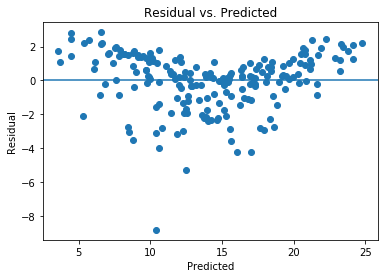

In [57]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

##### low multicollinearity:
Correlations among features should be low or nonexistent. When features are correlated, they may both explain the same pattern of variance in the outcome. The model will attempt to find a solution, potentially by attributing half the explanatory power to one feature and half to the other. This isn’t a problem if our only goal is prediction, because then all that matters is that the variance gets explained. However, if we want to know which features matter most when predicting an outcome, multicollinearity can cause us to underestimate the relationship between features and outcomes.

Multicollinearity can be fixed by PCA or by discarding some of the correlated features.

### Drill: fixing assumptions
Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality. Use the cell(s) below to see what you can do to fix it.

First, we want to look visualize the relationship between the outcome variable and each of the input variables. If there's a variable with no linear relationship with the outcome variable that variable will be our culprit for heteroscedasticity.

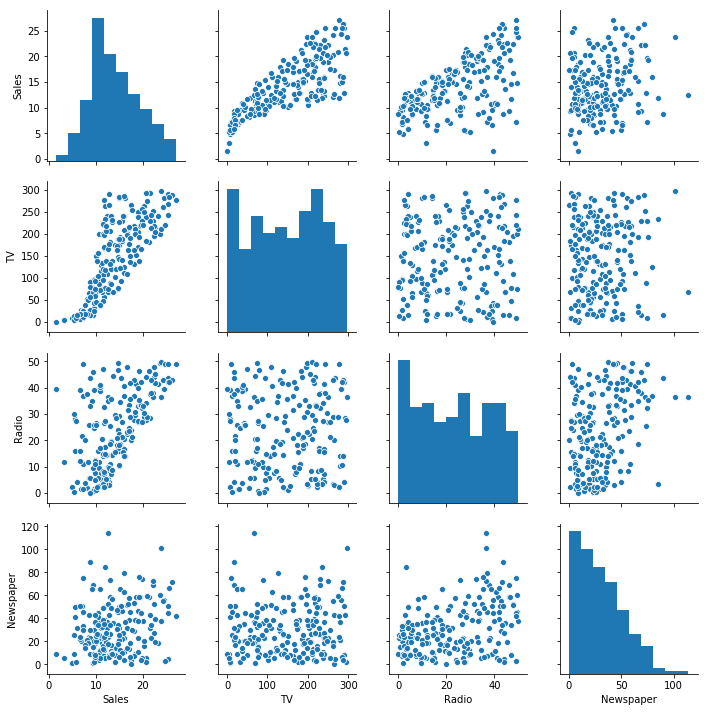

In [58]:
#let have a pairplot for the examination
sns.pairplot(data[['Sales', 'TV', 'Radio', 'Newspaper']].dropna(how = 'any', axis = 0))
plt.show()

**As can been seen in the first row of our scatter plot, unlike TV and radio, Newspaper does not share a linear relationship with Sale. We can confirm this further with a line plot.**

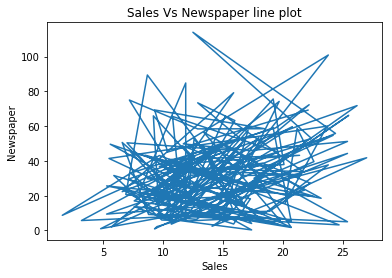

In [59]:
plt.plot(data.Sales, data.Newspaper)
plt.xlabel('Sales')
plt.ylabel('Newspaper')
plt.title('Sales Vs Newspaper line plot')
plt.show()

We can remove this variable as it migth not have any bearing with the outcome of our model. We are left with only TV and Radio

### Ordinary least square

In [60]:
# Ordinary Least Squares formula - dependent variable comes before the "~", then each independent variable
# https://stackoverflow.com/questions/30650257/ols-using-statsmodel-formula-api-versus-statsmodel-api
# http://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/

lsm_all_var_1 = smf.ols(formula = "Sales ~ TV + Radio + Newspaper", data = data).fit()
lsm_all_var_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 27 Dec 2018   Prob (F-statistic):           1.58e-96
Time:                        18:19:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Residuals Scatter Plot - Test for Heteroscedasicity:

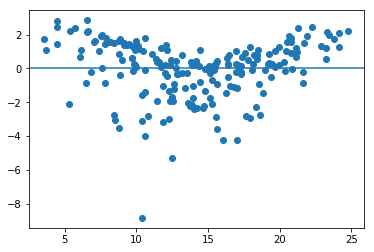

In [61]:
resid_1 = lsm_all_var_1.resid
plt.axhline(y=0)
plt.scatter(lsm_all_var_1.predict(), resid_1);

From the plot above we can see that our result tests positive to **heteroscedasicity** which is what we don't want. This means that our error distribution is not consistent. **Homoscedasicity** where the error points are clustered around the above y = 0 point as close as possible is what we want. We will try to play around with the input and outcome variables to see how close we can get to ideal homoscedacity. 

Aside from the Newspaper variable which we have deemed unfit for our model above, let's now look at the outcome variable (Sales) itself

##### Sales - outcome variable
We want the outcome variable to be as normal as possible and to have linear relationship with the independent variables.

In [62]:
# first let see it's description
data.Sales.describe()

count   200.000
mean     14.023
std       5.217
min       1.600
25%      10.375
50%      12.900
75%      17.400
max      27.000
Name: Sales, dtype: float64

The **mean** and **median** are quite close which suggests a level of normality. Let's carry out Shapirro test to be sure. We will also do a **Box Cox** transformation on this variable to bring it as close as possible to normality.

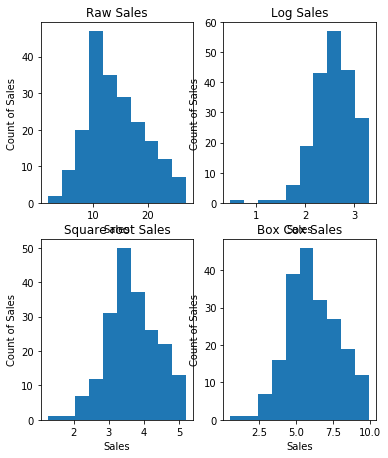

In [65]:
fig = plt.figure()
plt.subplots_adjust(left=None, bottom=-.5, right=None, top=None, wspace=None, hspace=None)

fig.add_subplot(221)
plt.hist(data['Sales'])
plt.title('Raw Sales')
plt.xlabel('Sales')
plt.ylabel('Count of Sales')

fig.add_subplot(222)
plt.hist(np.log(data['Sales']))
plt.title('Log Sales')
plt.xlabel('Sales')
plt.ylabel('Count of Sales')

fig.add_subplot(223)
plt.hist(np.sqrt(data['Sales'].replace(0, np.nan).dropna()))
plt.title('Square root Sales')
plt.xlabel('Sales')
plt.ylabel('Count of Sales')

ax3=fig.add_subplot(224)
# Box Cox Transformation:
# http://www.kmdatascience.com/2017/07/box-cox-transformations-in-python.html

transform_sales = np.asarray(data[['Sales']].values)

# transform values and store as "boxcox_sales"
boxcox_sales = boxcox(transform_sales)[0]

# create the boxcox_sales transformed variable:
data['boxcox_sales'] = boxcox_sales

# plot the transformed box cox data
plt.hist(boxcox_sales)
plt.title('Box Cox Sales')
plt.xlabel('Sales')
plt.ylabel('Count of Sales')

plt.show()

##### Now let's use shapiro to compare the normality of the log, square and boxcox of Sales. 
This test gives the W statistics or score(equivalent of t-values) and the p-value after comparing Sales and a corresponding transformation. As ussual we want a high score and reasonably high p-value(0.05) to proof a difference in distribution. 

In [66]:
print('Shapiro Test for Sales (Dependent Variable):')
print()
print('Log:         ', scipystats.shapiro(np.log(data['Sales'])))
print('Square Root: ', scipystats.shapiro(np.sqrt(data['Sales'])))
print('Box Cox:     ', scipystats.shapiro(data['boxcox_sales']))
print()
print('The Box Cox Transformation is the most normal of the three (largest W statistic/score)')
print()
print('First number = W statistic. Want one with highest W.')
print()
print('Second number = p-value. Want p-value > .05 (otherwise, indicates a significant difference)')

Shapiro Test for Sales (Dependent Variable):

Log:          (0.9519966244697571, 2.953277544293087e-06)
Square Root:  (0.9888856410980225, 0.12231794744729996)
Box Cox:      (0.9892246723175049, 0.13737188279628754)

The Box Cox Transformation is the most normal of the three (largest W statistic/score)

First number = W statistic. Want one with highest W.

Second number = p-value. Want p-value > .05 (otherwise, indicates a significant difference)


##### Dependent Variable Sales is now as normal as it'll get with boxcox transformation.
This feature will now be used as the outcome variable rather than the raw Sales col it's self in our model

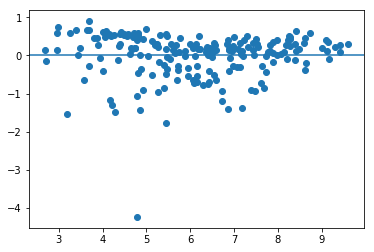

In [67]:
#in our new model, variables will be TV and radio only, outcome var will be boxcox_sales
lsm_2_var_2 = smf.ols(formula = "boxcox_sales ~ TV + Radio", data = data).fit()

resid_2 = lsm_2_var_2.resid
plt.axhline(y=0)
plt.scatter(lsm_2_var_2.predict(), resid_2);

Nuw we can see how much Heteroscedasticity of our prediction has improve with these two adjustments to our data.

##### Now let's try to remove outliers in our data and see if we can get even better with our model's error residual.

In [69]:
#first let's see our data description

print('TV data describe:')
print(data['TV'].describe(), "\n")

print('Radio data describe:')
print(data['Radio'].describe())

TV data describe:
count   200.000
mean    147.042
std      85.854
min       0.700
25%      74.375
50%     149.750
75%     218.825
max     296.400
Name: TV, dtype: float64 

Radio data describe:
count   200.000
mean     23.264
std      14.847
min       0.000
25%       9.975
50%      22.900
75%      36.525
max      49.600
Name: Radio, dtype: float64


As we can see from the description clipping out the lowest .5% of both the TV and radio data will help, we can cuttoff more but let's be conservation for now. This is informed by how far these values are from the means.


In [70]:
#comparing the largest and smallest 0.5% of TV and Radio data

print('Smallest 0.5% TV values:')
print(data['TV'].nsmallest(5))
print()
print('Largest 0.5% TV values:')
print(data['TV'].nlargest(5))

print()
print('Smallest 0.5% Radio values:')
print(data['Radio'].nsmallest(5))
print()
print('Largest 0.5% Radio values:')
print(data['Radio'].nlargest(5))

Smallest 0.5% TV values:
130   0.700
155   4.100
78    5.400
56    7.300
126   7.800
Name: TV, dtype: float64

Largest 0.5% TV values:
101   296.400
42    293.600
30    292.900
35    290.700
98    289.700
Name: TV, dtype: float64

Smallest 0.5% Radio values:
127   0.000
107   0.300
108   0.400
117   0.800
157   1.300
Name: Radio, dtype: float64

Largest 0.5% Radio values:
58    49.600
37    49.400
55    49.400
128   49.000
147   49.000
Name: Radio, dtype: float64


##### Let's now remove the outliers

In [71]:
tv_min = data[(data['TV'] < np.percentile(data['TV'],.5))]
radio_min = data[(data['Radio'] < np.percentile(data['Radio'],.5))]

In [72]:
# Remove min from TV and Radio
data = data.replace(0, np.nan).dropna()
data = data.replace(tv_min, np.nan).dropna()
data = data.replace(radio_min, np.nan).dropna()

# get minimum value row for TV
print('TV min:')
print(data.loc[data['TV'].idxmin()])
print()
print('Radio min:')
print(data.loc[data['Radio'].idxmin()])

# drop min values for features

TV min:
Unnamed: 0     156.000
TV               4.100
Radio           11.600
Newspaper        5.700
Sales            3.200
boxcox_sales     1.659
Name: 155, dtype: float64

Radio min:
Unnamed: 0     108.000
TV              90.400
Radio            0.300
Newspaper       23.200
Sales            8.700
boxcox_sales     4.310
Name: 107, dtype: float64


                            OLS Regression Results                            
Dep. Variable:           boxcox_sales   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     951.4
Date:                Thu, 27 Dec 2018   Prob (F-statistic):          4.89e-100
Time:                        18:56:39   Log-Likelihood:                -144.11
No. Observations:                 194   AIC:                             294.2
Df Residuals:                     191   BIC:                             304.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4965      0.091     27.317      0.0

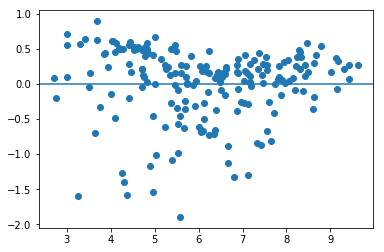

In [73]:
lm_3 = smf.ols(formula = "boxcox_sales ~ TV + Radio", data = data).fit()
print(lm_3.summary())

resid_3 = lm_3.resid
plt.axhline(y=0)
plt.scatter(lm_3.predict(), resid_3);

#####  As we can see removing those outliers did not improve the outcome of our model. We can also try to transform the TV and Radio data through boxcox, see if their normality improve and apply the transform to the model